In [1]:
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data

In [2]:
mnist = input_data.read_data_sets(r"D:\data",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting D:\data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting D:\data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting D:\data\t10k-images-idx3-ubyte.gz
Extracting D:\data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
def weight(shape):
    W=tf.Variable(tf.truncated_normal(shape,stddev=0.1),name='W')
    tf.summary.histogram('W',W)
    return W

In [4]:
def bias(shape):
    b=tf.Variable(tf.constant(0.1,shape=shape),name='b')
    tf.summary.histogram('b',b)
    return b

In [5]:
def conv2d(x,W):
    return tf.nn.conv2d(x,W,strides=[1,1,1,1],padding='SAME')

In [6]:
def max_pool_2x2(x):
    return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')

In [7]:
with tf.name_scope('Input_Layer'):
    x=tf.placeholder("float",shape=[None,784])
    x_image=tf.reshape(x,[-1,28,28,1])

In [8]:
with tf.name_scope('C1_Conv'):
    W1=weight([5,5,1,16])
    b1=bias([16])
    Conv1=conv2d(x_image,W1)+b1
    C1_Conv=tf.nn.relu(Conv1)

In [9]:
with tf.name_scope('C1_Pool'):
    C1_Pool=max_pool_2x2(C1_Conv,)

In [10]:
with tf.name_scope('C2_Conv'):
    W2=weight([5,5,16,36],)
    b2=bias([36],)
    Conv2=conv2d(C1_Pool,W2)+b2
    C2_Conv=tf.nn.relu(Conv2)

In [11]:
with tf.name_scope('C2_Pool'):
    C2_Pool=max_pool_2x2(C2_Conv)

In [12]:
with tf.name_scope('D_Flat'):
    D_Flat=tf.reshape(C2_Pool,[-1,1764])

In [13]:
with tf.name_scope('D_Hidden_Layer'):
    W3=weight([1764,128])
    b3=bias([128])
    D_Hidden=tf.nn.relu(tf.matmul(D_Flat,W3)+b3)
    D_Hidden_Dropout=tf.nn.dropout(D_Hidden,keep_prob=0.8)

In [14]:
with tf.name_scope('Output_Layer'):
    W4=weight([128,10])
    b4=bias([10])
    y_predict=tf.nn.softmax(tf.matmul(D_Hidden_Dropout,W4)+b4)

In [15]:
with tf.name_scope("optimizer"):
    y_label=tf.placeholder("float",shape=[None,10],name="y_label")
    loss_function=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y_predict,labels=y_label))
    acc_summary = tf.summary.scalar('loss',loss_function) 
    optimizer=tf.train.AdamOptimizer(learning_rate=0.0001).minimize(loss_function)

In [16]:
with tf.name_scope("evaluate_model"):
    correct_prediction=tf.equal(tf.argmax(y_predict,1),tf.argmax(y_label,1))
    accuracy=tf.reduce_mean(tf.cast(correct_prediction,"float"))
    acc_summary = tf.summary.scalar('accuracy',accuracy) 

In [17]:
merged=tf.summary.merge_all()

In [18]:
trainEpochs=30
batchSize=100
totalBatchs=int(mnist.train.num_examples/batchSize)
loss_list=[]
epoch_list=[]
accuracy_list=[]
from time import time

In [19]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [20]:
train_writer=tf.summary.FileWriter('log/CNN',sess.graph)

In [21]:
startTime=time()
for epoch in range(trainEpochs):
    for i in range(totalBatchs):
        batch_x,batch_y=mnist.train.next_batch(batchSize)
        sess.run(optimizer,feed_dict={x:batch_x,y_label:batch_y})
    loss,acc,s=sess.run([loss_function,accuracy,merged],feed_dict={x:mnist.validation.images,y_label:mnist.validation.labels})
    train_writer.add_summary(s,epoch)
    epoch_list.append(epoch)
    loss_list.append(loss)
    accuracy_list.append(acc)
    print("Train Eposh:","%02d"%(epoch+1),"Loss=","{:.9f}".format(loss),"Accuracy=",acc)
duration=time()-startTime
print("Train Finished takes:",duration)

Train Eposh: 01 Loss= 1.673885107 Accuracy= 0.8056
Train Eposh: 02 Loss= 1.633459091 Accuracy= 0.8362
Train Eposh: 03 Loss= 1.532889485 Accuracy= 0.9384
Train Eposh: 04 Loss= 1.514334202 Accuracy= 0.9536
Train Eposh: 05 Loss= 1.506441593 Accuracy= 0.9576
Train Eposh: 06 Loss= 1.498090863 Accuracy= 0.9682
Train Eposh: 07 Loss= 1.494894624 Accuracy= 0.9702
Train Eposh: 08 Loss= 1.491240382 Accuracy= 0.9728
Train Eposh: 09 Loss= 1.491295457 Accuracy= 0.9726
Train Eposh: 10 Loss= 1.487052560 Accuracy= 0.9766
Train Eposh: 11 Loss= 1.486057639 Accuracy= 0.976
Train Eposh: 12 Loss= 1.483321309 Accuracy= 0.98
Train Eposh: 13 Loss= 1.483799458 Accuracy= 0.9792
Train Eposh: 14 Loss= 1.482974648 Accuracy= 0.98
Train Eposh: 15 Loss= 1.480804086 Accuracy= 0.9824
Train Eposh: 16 Loss= 1.479769111 Accuracy= 0.9832
Train Eposh: 17 Loss= 1.478971720 Accuracy= 0.984
Train Eposh: 18 Loss= 1.479239106 Accuracy= 0.983
Train Eposh: 19 Loss= 1.479031682 Accuracy= 0.9838
Train Eposh: 20 Loss= 1.477454066 Accu

In [22]:
import matplotlib.pyplot as plt
def show_train_history(epoch_list,loss_list,title):
    fig=plt.gcf()
    fig.set_size_inches(4,2)
    plt.plot(epoch_list,loss_list,label='loss')
    plt.title(title)
    plt.ylabel("loss")
    plt.xlabel('Epoch')
    plt.legend(['loss'],loc='upper left')
    plt.show()

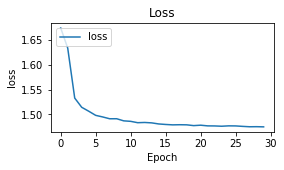

In [23]:
show_train_history(epoch_list,loss_list,"Loss")

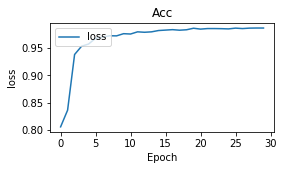

In [24]:
show_train_history(epoch_list,accuracy_list,"Acc")

In [25]:
print("Accuracy:",sess.run(accuracy,feed_dict={x:mnist.test.images,y_label:mnist.test.labels}))

Accuracy: 0.9869


In [26]:
prediction=sess.run(tf.argmax(y_predict,1),feed_dict={x:mnist.test.images})

In [27]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [28]:
import numpy as np
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig=plt.gcf()
    fig.set_size_inches(12,14)
    if num>25:num=25
    for i in range(0,num):
        ax=plt.subplot(5,5,1+i)
        ax.imshow(np.reshape(images[idx],(28,28)),cmap='binary')
        title= "label="+str(np.argmax(labels[idx]))
        if len(prediction)>0:
            title += ",predict="+str(prediction[idx])
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

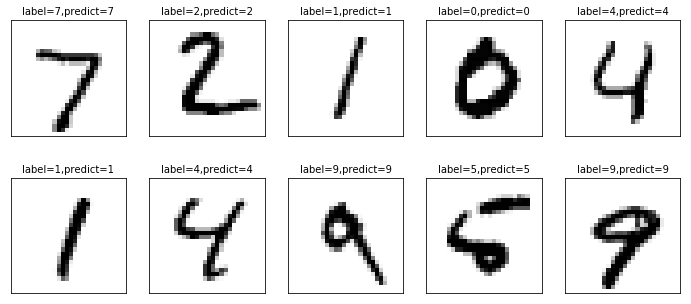

In [29]:
plot_images_labels_prediction(mnist.test.images,mnist.test.labels,prediction,0)

In [30]:
sess.close()